In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
!ls '/content/drive/My Drive/Eventlog/'


 Event_log.ipynb       'Example CSV for SM.pnml'    Example_xes_csv.csv
 Examplebadjulian.csv   Examplejulianchanges.csv    modified.csv
 Examplebadjulian.xes   Examplejulianchanges.pnml


In [0]:
!pip install pm4py

In [0]:
#Importing library to read log file
from pm4py.objects.log.importer.xes import factory as xes_import_factory

import pandas as pd


## loading xes file and reading the file

In [0]:
#File path
filename = '/content/drive/My Drive/Eventlog/Examplebadjulian.xes'

log = xes_import_factory.apply(filename)

In [60]:
#first trace
log[0]

{'attributes': {'concept:name': '88'}, 'events': [{'concept:name': 'a', 'lifecycle:transition': 'complete', 'time:timestamp': datetime.datetime(2013, 3, 17, 17, 56, tzinfo=datetime.timezone(datetime.timedelta(-1, 68400)))}, '..', {'concept:name': 'h', 'lifecycle:transition': 'complete', 'time:timestamp': datetime.datetime(2013, 3, 22, 17, 56, tzinfo=datetime.timezone(datetime.timedelta(-1, 68400)))}]}

## converting xes to csv and reading the file using pandas

In [0]:
from pm4py.objects.log.exporter.csv import factory as csv_exporter

csv_exporter.export(log, "/content/drive/My Drive/Eventlog/Example_xes_csv.csv")

In [0]:
filename =  "/content/drive/My Drive/Eventlog/Example_xes_csv.csv"
df = pd.read_csv(filename)

In [63]:
df.head()

case:concept:name  ...             time:timestamp
0                 88  ...  2013-03-17 17:56:00-05:00
1                 88  ...  2013-03-18 17:56:00-05:00
2                 88  ...  2013-03-19 17:56:00-05:00
3                 88  ...  2013-03-20 17:56:00-05:00
4                 88  ...  2013-03-21 17:56:00-05:00

[5 rows x 4 columns]

## Function to convert single event to combined event

In [0]:
def modify_data(df_eve,unique_id):
  
  case_id = []
  activity_id = []
  complete_time_stamp = []
  lifecycle_transition = []

  for i in range(1,len(unique_id)+1):
  
    row_filter = df_eve.loc[df_eve['case:concept:name']==i,:]
    row_filter  = row_filter.reset_index(drop=True)
  
    for n in range(len(row_filter)):
      case_id.append(row_filter.loc[row_filter['case:concept:name']==i,'case:concept:name'][n])
    
    case_id.append(row_filter.loc[row_filter['case:concept:name']==i,'case:concept:name'][n])
  
  
  
  for i in range(1,len(unique_id)+1):
  
    row_filter = df_eve.loc[df_eve['case:concept:name']==i,:]
    row_filter  = row_filter.reset_index(drop=True)
    
    for n in range(len(row_filter)):
      complete_time_stamp.append(row_filter.loc[row_filter['case:concept:name']==i,'time:timestamp'][n])
    
    complete_time_stamp.append(row_filter.loc[row_filter['case:concept:name']==i,'time:timestamp'][n])
    
    
  for i in range(1,len(unique_id)+1):
  
    row_filter = df_eve.loc[df_eve['case:concept:name']==i,:]
    row_filter  = row_filter.reset_index(drop=True)
    
    for n in range(len(row_filter)):
      lifecycle_transition .append(row_filter.loc[row_filter['case:concept:name']==i,'lifecycle:transition'][n])
    
    lifecycle_transition.append(row_filter.loc[row_filter['case:concept:name']==i,'lifecycle:transition'][n])
    
  
  for i in range(1,len(unique_id)+1):
  
    row_filter = df_eve.loc[df_eve['case:concept:name']==i,:]
    row_filter  = row_filter.reset_index(drop=True)
  
    activity_id.append('Start')
    for n in range(len(row_filter)-1):
      activity_id.append(row_filter.loc[row_filter['case:concept:name']==i,'concept:name'][n]+row_filter.loc[row_filter['case:concept:name']==i,'concept:name'][n+1])
    
    activity_id.append('End')
  
  
  dic_data = {'case:concept:name':case_id,'concept:name':activity_id,'lifecycle:transition':lifecycle_transition,'time:timestamp':complete_time_stamp, }
  df_modified = pd.DataFrame(dic_data)
  
  return df_modified

In [0]:
unique_id = df["case:concept:name"].unique()
modified_csv = modify_data(df,unique_id)

In [15]:
modified_csv.head()

case:concept:name  ...             time:timestamp
0                  1  ...  2012-04-03 16:55:00-05:00
1                  1  ...  2012-04-04 16:57:00-05:00
2                  1  ...  2012-04-05 16:58:00-05:00
3                  1  ...  2012-04-06 16:59:00-05:00
4                  1  ...  2012-04-07 17:55:00-05:00

[5 rows x 4 columns]

In [0]:
modified_csv.to_csv('/content/drive/My Drive/apps/Maryam/Eventlog//modified.csv',index=True)

# Exploring XES file

## Function to convert from single event  to combined events
#### It is not completed

In [0]:
for i in range(len(log[0])-1):
  print(log[0][i]["concept:name"]+log[0][i+1]["concept:name"])
  
for i in range(len(log[0])):
  print(log[0][i]["lifecycle:transition"])
print(log[0][i]["lifecycle:transition"])


for i in range(len(log[0])):
  print(log[0][i]["time:timestamp"])
print(log[0][i]["time:timestamp"])

## Data type of XES file data

In [16]:
print(type(log[0]))
print(type(log[0][0]))
print(type(log[0][0]["concept:name"]))
print(type(log[0][0]["lifecycle:transition"]))
print(type(log[0][0]["time:timestamp"]))

<class 'pm4py.objects.log.log.Trace'>
<class 'pm4py.objects.log.log.Event'>
<class 'str'>
<class 'str'>
<class 'datetime.datetime'>


##### Converting log file to DataFrame

In [0]:
five_trace = log[1]
df = pd.DataFrame(five_trace)

In [18]:
type(log[0][0])

pm4py.objects.log.log.Event

In [19]:
first_trace_concept_name = log[0].attributes["concept:name"]
first_trace_concept_name

'88'

In [20]:
first_event_first_trace_concept_name = log[1][1]["concept:name"]
first_event_first_trace_concept_name

'b'

In [0]:
for case_index, case in enumerate(log):
    print("\n case index: %d  case id: %s" % (case_index, case.attributes["concept:name"]))
    for event_index, event in enumerate(case):
        print("event index: %d  event activity: %s" % (event_index, event["concept:name"]))

In [0]:
for case_index, case in enumerate(log):
    print("\n case index: %d  case id: %s" % (case_index, case.attributes["concept:name"]))
    for event_index, event in enumerate(case):
        print("e_index: %d  e_activity: %s e_transaction: %s e_time: %s" % (event_index, event["concept:name"], event["lifecycle:transition"], event["time:timestamp"]))

In [0]:
case_in = enumerate(log)

In [0]:
ls_trace = list(case_in)

# Computing Fitnes 

In [0]:
"""
consuming
missing
producing
remaining
"""
file = {'t1':{'c':6,'m':1,'p':6,'r':1},'t2':{'c':6,'m':1,'p':6,'r':0},'t3':{'c':6,'m':0,'p':6,'r':0}}


def fitness(file,frequency):
  
  sum_of_c = 0
  sum_of_m = 0
  sum_of_r = 0
  sum_of_p = 0
  
  trace = {}
  
  for k, v in file.items():
    if k not in trace:
      trace[k] = {'c':0,'m':0,'p':0,'r':0}
      
      for ik, iv in trace[k].items():
        if ik == 'c' :
          trace[k][ik] = file[k][ik] * frequency[k] 
        elif ik == 'm':
          trace[k][ik] = file[k][ik] * frequency[k] 
        elif ik == 'p':
          trace[k][ik] = file[k][ik] * frequency[k] 
        else :
          trace[k][ik] = file[k][ik] * frequency[k] 
 
  
  for k, v in trace.items():

    for ik, iv in v.items():
      if ik == 'c' :
        sum_of_c += v[ik]
      elif ik == 'm':
        sum_of_m += v[ik]
      elif ik == 'p':
        sum_of_p += v[ik]
      else :
        sum_of_r += v[ik]
        
  fitness = 1/2 * (1-sum_of_m/sum_of_c) + 1/2 *(1-sum_of_r/sum_of_p)
  
  result = '%.2f' % fitness + ' %'
        
  return result
 

In [23]:
frequency = {'t1':10,'t2':5,'t3':1}
result = fitness(file,frequency)
result

'0.87 %'

# Exploring  PNML file

In [24]:
import os
from pm4py.objects.petri.importer import pnml as pnml_importer

filename = '/content/drive/My Drive/Eventlog/Example CSV for SM.pnml'

net, initial_marking, final_marking = pnml_importer.import_net(filename)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated function import_net.
  


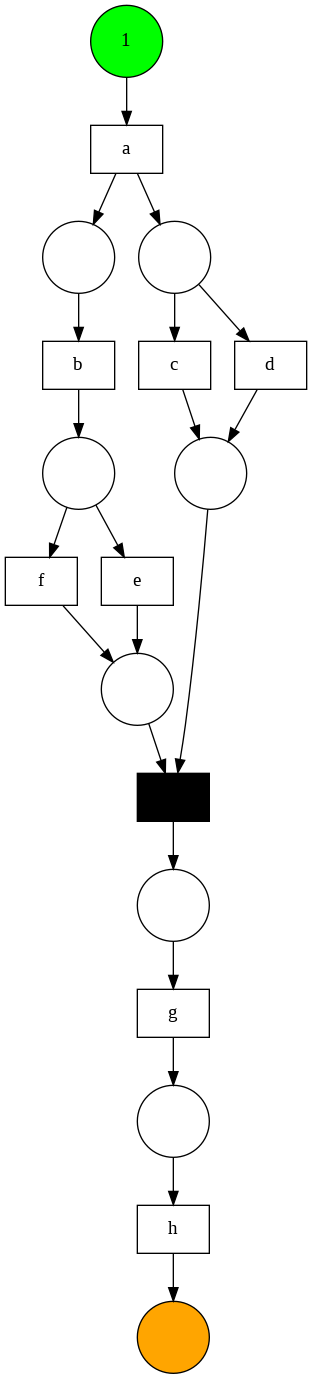

In [25]:
from pm4py.visualization.petrinet import factory as pn_vis_factory

gviz = pn_vis_factory.apply(net, initial_marking, final_marking)
pn_vis_factory.view(gviz)

In [0]:
from pm4py.objects.petri import semantics

transitions = semantics.enabled_transitions(net, initial_marking)

In [0]:
place = net.places
transitions = net.transitions
arc = net.arcs

## Token replay

In [0]:
file = {'t1':{'c':6,'m':1,'p':6,'r':1},'t2':{'c':6,'m':1,'p':6,'r':0},'t3':{'c':6,'m':0,'p':6,'r':0}}


In [0]:
# This functions gets transions in


def trans_in(trans_inputs):
  import re
  trainsition_input = []
  place_out = []
  arc_s = str(trans_inputs)
  arc_clean = re.sub('[^A-Za-z0-9,->]+', '', arc_s)
  arc_f = arc_clean.split(",")
  
  for i in range(len(arc_f)):
    arc_f[i]=arc_f[i][1:]
    arc_f[i] = arc_f[i].split("->")
    trainsition_input.append(arc_f[i][1][1:])
    place_out.append(arc_f[i][0])
    
  return place_out,trainsition_input
  

trans_inputs = []
for place in net.places:
  
  for arc in place.out_arcs:
    trans_inputs.append(arc)
        
place_output,trans_input = trans_in(trans_inputs)

In [29]:
place_output

['n5', 'n8', 'n3', 'n6', 'n1', 'n1', 'n2', 'n4', 'n4', 'n7']

In [30]:
trans_input

['h', 'a', 'n18', 'b', 'e', 'f', 'n18', 'd', 'c', 'g']

In [0]:
transition_many_input = {}
   
# This code describes how many places are incoming places to a transition

for t , p in enumerate(zip(place_output,trans_input)):
   
  if p[0] not in transition_many_input.keys():
    transition_many_input[p[0]] = 1
  else:
    transition_many_input[p[0]] += 1


In [32]:
transition_many_input

{'n1': 2, 'n2': 1, 'n3': 1, 'n4': 2, 'n5': 1, 'n6': 1, 'n7': 1, 'n8': 1}

In [33]:
trans_place = []
for t , p in enumerate(zip(place_output,trans_input)):
  if "n18" == p[1]:
    trans_place.append(p[0])

trans_place  

['n3', 'n2']

In [0]:
# This functions get transions out

def trans_out(trans_out):
  import re
  trainsition_output = []
  place_in = []
  arc_s = str(trans_out)
  arc_clean = re.sub('[^A-Za-z0-9,->]+', '', arc_s)
  arc_f = arc_clean.split(",")
  
  for i in range(len(arc_f)):
    arc_f[i]=arc_f[i][1:]
    arc_f[i] = arc_f[i].split("->")
    trainsition_output.append(arc_f[i][0]) 
    place_in.append(arc_f[i][1][1:])
    
  return trainsition_output,place_in 
  

transitions_out = []
for trans in transitions:
#    trans_unique_name[trans.name]= trans.label
    for arc in trans.out_arcs:
        transitions_out.append(arc)
        
trans_output, place_input = trans_out(transitions_out)

In [36]:
trans_output

['a', 'a', 'c', 'f', 'g', 'b', 'n18', 'd', 'e', 'h']

In [37]:
place_input

['n4', 'n6', 'n3', 'n2', 'n5', 'n1', 'n7', 'n3', 'n2', 'n9']

In [0]:
# This code describes how many places are output places with a transition

transition_many_output = {}

for t , p in enumerate(zip(trans_output,place_input)):
   
  if p[0] not in transition_many_output.keys():
    transition_many_output[p[0]] = 1
  else:
    transition_many_output[p[0]] += 1
  

### Step 1
#### Places are with 0 tokens

In [0]:
place_tokens = {}
for place in net.places:
    place_tokens[place.name] = 0

In [48]:
place_tokens

{'n1': 0,
 'n2': 0,
 'n3': 0,
 'n4': 1,
 'n5': 0,
 'n6': 1,
 'n7': 0,
 'n8': 0,
 'n9': 0}

### Step 2
#### Find out of  " start "  transition and places are connected with the start transition. The outcoming place will produce one token.

In [46]:
# This code shows places which are connected with a transitions

trans_place = []
for t , p in enumerate(zip(trans_output,place_input)):
  if "a" == p[0]:
    trans_place.append(p[1])
    
#produce tokens
  for i in trans_place:
    place_tokens[i] = 1

trans_place   

['n4', 'n6']

### Step 3
#### 

In [0]:
trans_place= []
place_trans = []

previous_trans_place = []
place_p_c = {}

for t , p in enumerate(zip(trans_output,place_input,place_output,trans_input)):
  if "b" == p[0]:
    trans_place.append(p[1])
    previous_trans_place.append(p[1])
    
  if "b" == p[3]:
    place_trans.append(p[2])
    
    
    
#Checking whether the incoming places has enough tokens or not
  for i in place_trans:
#only one incoming is to the transitions    
    if len(place_trans) ==1:
      if place_tokens[i] == 1:
        place_p_c[key]["c"] = 1
        fire_trans("b",place_trans,trans_place)
         
        
#More than one incoming places are to the transitions       
    if len(place_trans) > 1:
      place_values = {}
      for i in place_trans:
        values[i] = place_tokens[i]
   
      if True == all(x==0 for x in place_values.values()):
        
        for key, value in place_values:
          place_p_c[key]["c"] = 1
      
        fire_trans("b",place_trans,trans_place)
        break
        
      else :
        h_value = max([(value, key) for key, value in place_values.items()])[0]
        
      for key, value in place_values.items():
        needed_tokens = h_value - place_values[key]
        place_tokens[key] = needed_tokens
        place_p_c[key]["m"] = needed_tokens
        place_p_c[key]["c"] = 1
       
      fire_trans("b",place_trans,trans_place)
      break
           
      


In [0]:
def fire_trans(trans, place_trans, trans_place):
  for i in place_trans:
    place_tokens[i] = 0
   
  for i in trans_place:
    place_tokens[i] = 1
    place_p_c[key]["p"] = 1
    
  return 
  
  

In [43]:

modified_csv.head(7)

case:concept:name  ...             time:timestamp
0                  1  ...  2012-04-03 16:55:00-05:00
1                  1  ...  2012-04-04 16:57:00-05:00
2                  1  ...  2012-04-05 16:58:00-05:00
3                  1  ...  2012-04-06 16:59:00-05:00
4                  1  ...  2012-04-07 17:55:00-05:00
5                  1  ...  2012-04-08 17:56:00-05:00
6                  1  ...  2012-04-08 17:56:00-05:00

[7 rows x 4 columns]

In [0]:
unique_id = modified_csv["case:concept:name"].unique()

row_filter = modified_csv.loc[modified_csv['case:concept:name']==1,:]
row_filter  = row_filter.reset_index(drop=True)

p =0 
c = 0
for n in range(len(row_filter)):
  if row_filter.loc[row_filter['case:concept:name']==1,'concept:name'][n] == "Start":
    p += 1
    c += 1
    for p, t in place_in_arc.items():
      if "start" == i:
        place_l[t] = 1
          

In [44]:
  p=0
  c=0
  r=0
  m=0

  for i in range(1,len(unique_id)+1):
  
    row_filter = modified_csv.loc[modified_csv['case:concept:name']==i,:]
    row_filter  = row_filter.reset_index(drop=True)

    for n in range(len(row_filter)):
      print(row_filter.loc[row_filter['case:concept:name']==i,'concept:name'][n])
      
      if row_filter.loc[row_filter['case:concept:name']==i,'concept:name'][n] == "Start":
        p = 1
        c = 1
        for i, k in place_in_arc.items():
          if "start" == i:
            place_l[k] = 1
       
      
      elif row_filter.loc[row_filter['case:concept:name']==i,'concept:name'][n] =
      
  
        
        


SyntaxError: ignored